In [33]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [34]:
import warnings
warnings.filterwarnings('ignore')

In [119]:
df = pd.read_csv('UK_Accident.csv')
df = df.drop('Unnamed: 0', axis=1)
df = df.set_index('Accident_Index')
df.sample(4)

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,...,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Year
Accident_Index,,,,,,,,,,,,,,,,,,,,,
200720H075102,397970.0,298830.0,-2.031407,52.587243,20,3,2,1,12/11/2007,2,...,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Wet/Damp,NaN,NaN,1,Yes,E01010409,2007
2.01E+12,427620.0,430040.0,-1.582472,53.765977,13,3,2,1,06/08/2007,2,...,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,NaN,NaN,1,Yes,E01011318,2007
2.01E+12,308320.0,546900.0,-3.427980,54.808572,3,3,1,1,27/09/2013,6,...,No physical crossing within 50 meters,Darkeness: No street lighting,Fine without high winds,Dry,NaN,NaN,2,Yes,E01019102,2013
201301JI40668,546050.0,187220.0,0.105752,51.564896,1,3,1,1,18/11/2013,2,...,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,NaN,NaN,1,Yes,E01003767,2013


## จำนวน rows และ columns

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1504150 entries, 200501BS00001 to 2.01E+12
Data columns (total 31 columns):
 #   Column                                       Non-Null Count    Dtype  
---  ------                                       --------------    -----  
 0   Location_Easting_OSGR                        1504049 non-null  float64
 1   Location_Northing_OSGR                       1504150 non-null  float64
 2   Longitude                                    1504049 non-null  float64
 3   Latitude                                     1504150 non-null  float64
 4   Police_Force                                 1504150 non-null  int64  
 5   Accident_Severity                            1504150 non-null  int64  
 6   Number_of_Vehicles                           1504150 non-null  int64  
 7   Number_of_Casualties                         1504150 non-null  int64  
 8   Date                                         1504150 non-null  object 
 9   Day_of_Week                           

## column ที่มี null

In [37]:
df.isna().sum()

Location_Easting_OSGR                              101
Location_Northing_OSGR                               0
Longitude                                          101
Latitude                                             0
Police_Force                                         0
Accident_Severity                                    0
Number_of_Vehicles                                   0
Number_of_Casualties                                 0
Date                                                 0
Day_of_Week                                          0
Time                                               117
Local_Authority_(District)                           0
Local_Authority_(Highway)                            0
1st_Road_Class                                       0
1st_Road_Number                                      0
Road_Type                                            0
Speed_limit                                          0
Junction_Control                                602835
2nd_Road_C

In [41]:
df['Road_Surface_Conditions'].fillna('Normal', inplace = True)
df['Special_Conditions_at_Site'].fillna('None', inplace = True)
df['Carriageway_Hazards'].fillna('None', inplace = True)
df['Did_Police_Officer_Attend_Scene_of_Accident'].fillna('No', inplace = True)
df['Weather_Conditions'].fillna('Unknown', inplace = True)
df['Junction_Control'].fillna('None', inplace = True)
df['Location_Easting_OSGR'].fillna(0, inplace = True)
df['Longitude'].fillna(0, inplace = True)

## จำนวนรถและคนเสียชีวิตจากอุบัติเหตุตามวัน

In [57]:
days = df.groupby('Day_of_Week')[['Number_of_Casualties']].sum()
days.sort_values(by='Number_of_Casualties', ascending=False)

,Number_of_Casualties
Day_of_Week,
6,331934
5,299044
4,297756
3,294476
7,285261
2,284043
1,239532


In [59]:
vehicles = df.groupby('Day_of_Week')[['Number_of_Vehicles']].sum()
vehicles.sort_values(by='Number_of_Vehicles', ascending=False)

,Number_of_Vehicles
Day_of_Week,
6,456709
4,418824
5,418738
3,414901
2,393244
7,358923
1,293671


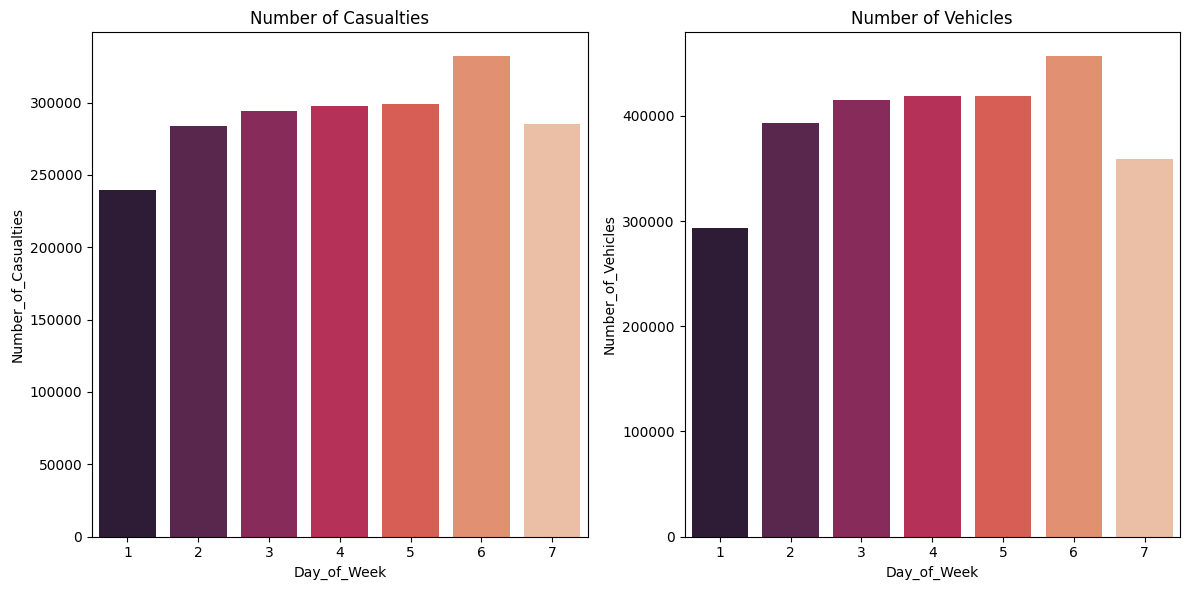

In [60]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

sns.barplot(data=days, x='Day_of_Week', y='Number_of_Casualties', palette='rocket', ax=axs[0])
axs[0].set_title('Number of Casualties')

sns.barplot(data=vehicles, x='Day_of_Week', y='Number_of_Vehicles', palette='rocket', ax=axs[1])
axs[1].set_title('Number of Vehicles')

plt.tight_layout()
plt.show()

## อัตราการเสียชีวิตเมื่อเทียบกับสภาพอากาศ

In [103]:
casualties_by_weather = df.groupby('Weather_Conditions')[['Number_of_Casualties']].sum()

weather_counts = df['Weather_Conditions'].value_counts()
# หารด้วยจำนวนของสภาพอากาศ เพื่อความเท่าเทียม
normalized_casualties = casualties_by_weather['Number_of_Casualties'] / weather_counts
normalized_casualties = normalized_casualties.sort_values(ascending=False)
normalized_casualties

Weather_Conditions
Fog or mist                   1.440415
Snowing with high winds       1.418878
Raining with high winds       1.395858
Raining without high winds    1.394376
Fine with high winds          1.374285
Other                         1.357669
Fine without high winds       1.345408
Snowing without high winds    1.343863
Unknown                       1.231229
dtype: float64

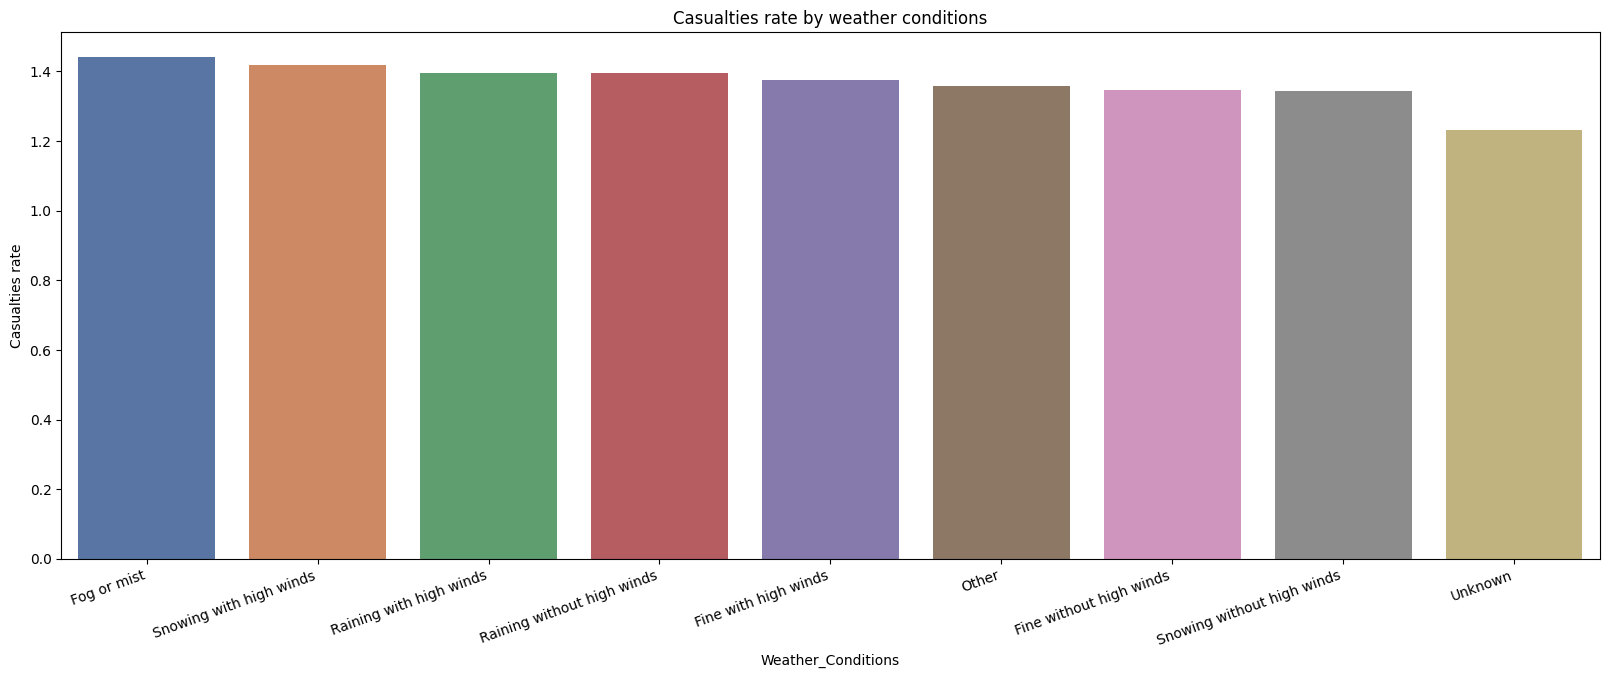

In [112]:
plt.figure(figsize=(16, 6))
sns.barplot(normalized_casualties, palette='deep')
plt.tight_layout()
plt.xticks(rotation=20, ha='right')
plt.ylabel('Casualties rate')
plt.title('Casualties rate by weather conditions')
plt.show()